<a href="https://colab.research.google.com/github/minhhuong2001/vsfc/blob/main/vsfc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

X_train = pd.read_csv('drive/MyDrive/UIT-VSFC/train/sents.txt',  sep='\r\n', header=None, index_col=None)
y_train = pd.read_csv('drive/MyDrive/UIT-VSFC/train/sentiments.txt',  sep='\r\n', header=None, index_col=None)
X_dev = pd.read_csv('drive/MyDrive/UIT-VSFC/dev/sents.txt', sep='\r\n', header=None, index_col=None)
y_dev = pd.read_csv('drive/MyDrive/UIT-VSFC/dev/sentiments.txt', sep='\r\n', header=None, index_col=None)
X_test = pd.read_csv('drive/MyDrive/UIT-VSFC/test/sents.txt',  sep='\r\n', header=None, index_col=None)
y_test = pd.read_csv('drive/MyDrive/UIT-VSFC/test/sentiments.txt',  sep='\r\n', header=None, index_col=None)

y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()

<ipython-input-14-74c22d21c6c6>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  X_train = pd.read_csv('drive/MyDrive/UIT-VSFC/train/sents.txt',  sep='\r\n', header=None, index_col=None)
<ipython-input-14-74c22d21c6c6>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  y_train = pd.read_csv('drive/MyDrive/UIT-VSFC/train/sentiments.txt',  sep='\r\n', header=None, index_col=None)
<ipython-input-14-74c22d21c6c6>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid t

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
encoder = CountVectorizer(ngram_range=(2, 2))
encoder.fit(X_train[0])

CountVectorizer(ngram_range=(2, 2))

In [ ]:
encoder.vocabulary_

{'slide giáo': 19651,
 'giáo trình': 7042,
 'trình đầy': 23733,
 'đầy đủ': 30215,
 'nhiệt tình': 15712,
 'tình giảng': 24486,
 'giảng dạy': 7216,
 'dạy gần': 5850,
 'gần gũi': 7752,
 'gũi với': 7734,
 'với sinh': 27898,
 'sinh viên': 19599,
 'đi học': 29041,
 'học đầy': 9663,
 'đủ full': 31210,
 'full điểm': 6736,
 'điểm chuyên': 29158,
 'chuyên cần': 1996,
 'chưa áp': 2398,
 'áp dụng': 28786,
 'dụng công': 6383,
 'công nghệ': 4229,
 'nghệ thông': 14845,
 'thông tin': 21499,
 'tin và': 22823,
 'và các': 26723,
 'các thiết': 3263,
 'thiết bị': 20690,
 'bị hỗ': 1334,
 'hỗ trợ': 9803,
 'trợ cho': 24094,
 'cho việc': 1928,
 'việc giảng': 26506,
 'thầy giảng': 21839,
 'giảng bài': 7185,
 'bài hay': 567,
 'hay có': 7940,
 'có nhiều': 3872,
 'nhiều bài': 15482,
 'bài tập': 670,
 'tập ví': 25371,
 'ví dụ': 27343,
 'dụ ngay': 6325,
 'ngay trên': 14592,
 'trên lớp': 23548,
 'giảng viên': 7312,
 'viên đảm': 26412,
 'đảm bảo': 30149,
 'bảo thời': 1145,
 'thời gian': 22458,
 'gian lên': 6862,
 'lên

In [ ]:
X_train_encoded = encoder.transform(X_train[0])
X_dev_encoded = encoder.transform(X_dev[0])
X_test_encoded = encoder.transform(X_test[0])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_encoded, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_encoded)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred, average='macro')*100)

86.26026531901452
61.264058918064244


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)

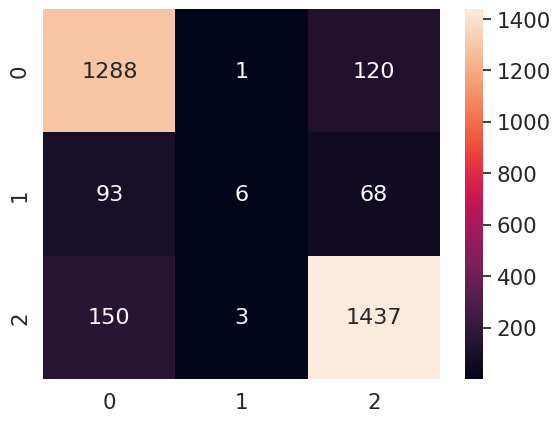

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cf, range(3), range(3))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')

plt.show()